# The Sparks Foundation
## Task 1: Data Science and Business Analytics Internship May'21
## Submission by - Abhishek Srivastav

Task: Prediction using Unsupervised Learning Model for predicting the optimum number of clusters and represent it visually.

In [73]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
%matplotlib inline

In [74]:
#Loading the dataset
iris = datasets.load_iris()

df = pd.DataFrame(iris.data, columns = iris.feature_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [75]:
#Looking at column head values
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [76]:
#modifying column head values for convenience 
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '').str.replace('(', '').str.replace(')', '')
df.columns

Index(['sepallengthcm', 'sepalwidthcm', 'petallengthcm', 'petalwidthcm'], dtype='object')

Text(0, 0.5, 'sepal width(cm)')

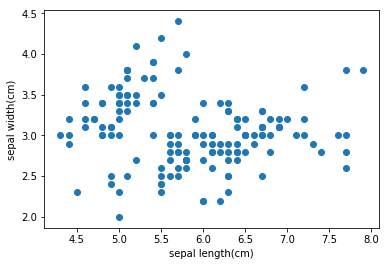

In [90]:
plt.scatter(df['sepallengthcm'], df['sepalwidthcm'])
plt.xlabel('sepal length(cm)')
plt.ylabel('sepal width(cm)')

In [78]:
#importing modules
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

## Elbow Method

In [79]:
x = df.iloc[:, 0:4].values

wcss = []

for k in range(1, 10):
    km = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    


Text(0, 0.5, 'WCSS')

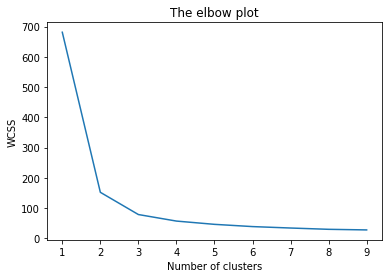

In [80]:
#Elbow Plot
plt.plot(range(1, 10), wcss)
plt.title('The elbow plot')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

### From the elbow plot above, we conclude the number of clusters = 3

In [99]:
#applying kmeans to the dataset
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(x)
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [82]:
df['cluster'] = y_predicted

df.head()

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


### Visualising the clusters

In [83]:
km.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

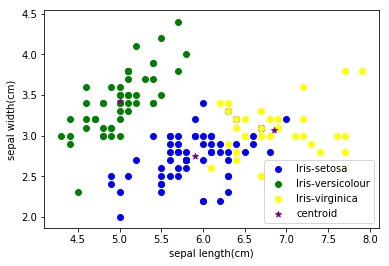

In [89]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

#visualizing the clusters on the first two columns - sepal length and sepal width
plt.scatter(df1['sepallengthcm'],df1['sepalwidthcm'],color='blue', label='Iris-setosa')
plt.scatter(df2['sepallengthcm'],df2['sepalwidthcm'],color='green', label = 'Iris-versicolour')
plt.scatter(df3['sepallengthcm'],df3['sepalwidthcm'],color='yellow', label = 'Iris-virginica')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('sepal length(cm)')
plt.ylabel('sepal width(cm)')
plt.legend()

### Preprocessing using min max scaler

Required if centroids are not actual centroids in plot (occurs due to scaling problem)
{Preprocessing is not required in this case though}

In [92]:
scaler = MinMaxScaler()

scaler.fit(df[['sepallengthcm']])
df['sepallengthcm'] = scaler.transform(df[['sepallengthcm']])

scaler.fit(df[['sepalwidthcm']])
df['sepalwidthcm'] = scaler.transform(df[['sepalwidthcm']])

In [93]:
df.head()

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,cluster
0,0.222222,0.625000,0.067797,0.041667,1
1,0.166667,0.416667,0.067797,0.041667,1
2,0.111111,0.500000,0.050847,0.041667,1
3,0.083333,0.458333,0.084746,0.041667,1
4,0.194444,0.666667,0.067797,0.041667,1


Text(0, 0.5, 'sepal width(cm)')

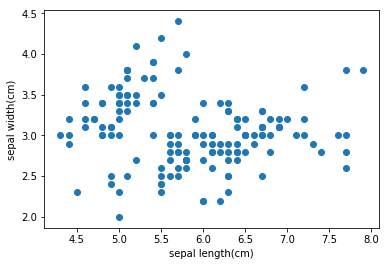

In [91]:
plt.scatter(df['sepallengthcm'], df['sepalwidthcm'])
plt.xlabel('sepal length(cm)')
plt.ylabel('sepal width(cm)')

In [94]:
#applying kmeans to the preprocessed dataset
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(x)
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [95]:
df['cluster'] = y_predicted

In [97]:
km.cluster_centers_

array([[0.44125683, 0.30737705, 0.57571548, 0.54918033],
       [0.19611111, 0.595     , 0.07830508, 0.06083333],
       [0.70726496, 0.4508547 , 0.79704476, 0.82478632]])

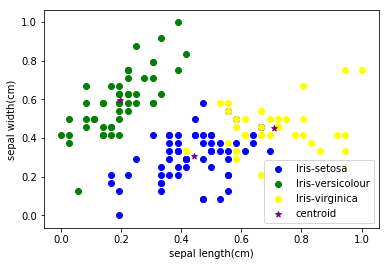

In [98]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

#visualizing the clusters on the first two columns - sepal length and sepal width
plt.scatter(df1['sepallengthcm'],df1['sepalwidthcm'],color='blue', label='Iris-setosa')
plt.scatter(df2['sepallengthcm'],df2['sepalwidthcm'],color='green', label = 'Iris-versicolour')
plt.scatter(df3['sepallengthcm'],df3['sepalwidthcm'],color='yellow', label = 'Iris-virginica')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('sepal length(cm)')
plt.ylabel('sepal width(cm)')
plt.legend()